In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import qqplot 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc,accuracy_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [8]:
#what is my current working directory?

import os
os.getcwd()

'E:\\All My Projects\\Machine Learning\\EDA,Classification,Regression'

In [9]:
# Importing Dataset
df = pd.read_csv(r'E:\\All My Projects\\Machine Learning\\EDA,Classification,Regression\heartdisease.csv')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
# Fix Data Types
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

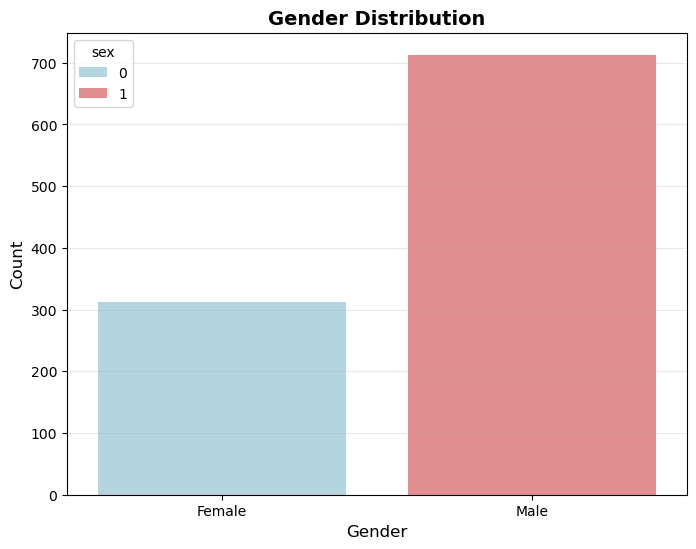

In [13]:
# Histogram
plt.figure(figsize=(8, 6))
plt.title('Gender Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='sex', data=df, hue='sex', legend='auto', palette=['lightblue', 'lightcoral'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(axis='y', alpha=0.3)

plt.show()

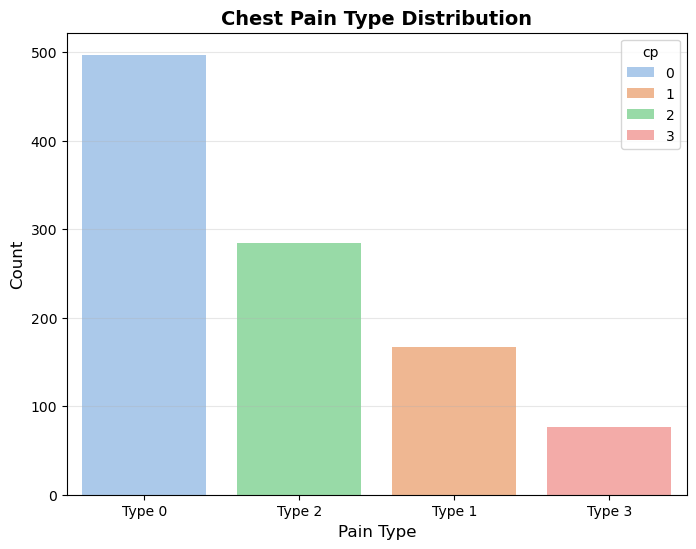

In [14]:
# Simplified Histogram
plt.figure(figsize=(8, 6))
plt.title('Chest Pain Type Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='cp', data=df, palette='pastel', hue ='cp', legend ='auto',order=df['cp'].value_counts().index)
plt.xlabel('Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Type 0', 'Type 2', 'Type 1', 'Type 3'])
plt.grid(axis='y', alpha=0.3)

plt.show()


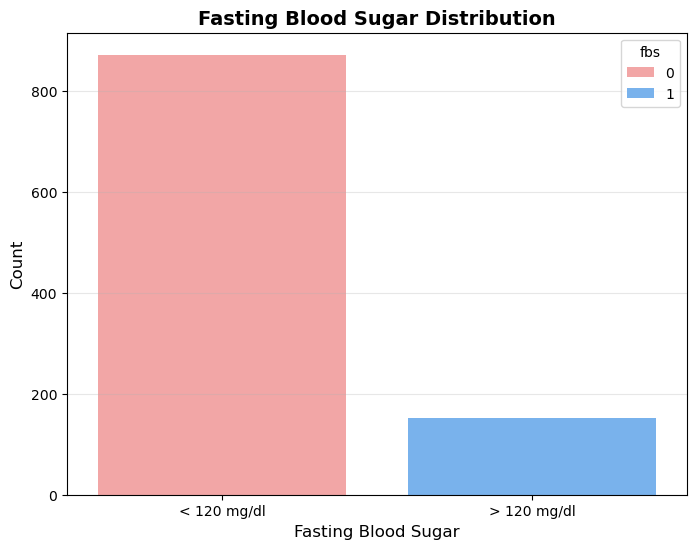

In [15]:
# --- Simplified Histogram ---
plt.figure(figsize=(8, 6))
plt.title('Fasting Blood Sugar Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='fbs', data=df, palette=['#FF9999', '#66B2FF'], hue ='fbs', legend ='auto',
              order=df['fbs'].value_counts().index)
plt.xlabel('Fasting Blood Sugar', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['< 120 mg/dl', '> 120 mg/dl'])
plt.grid(axis='y', alpha=0.3)

plt.show()

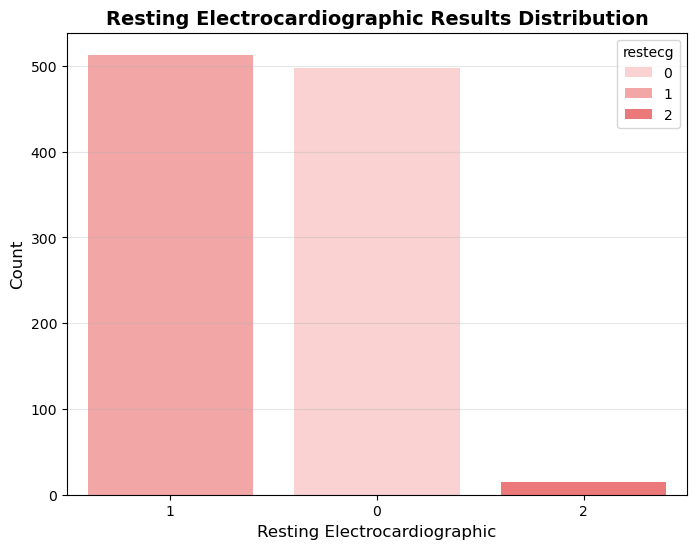

In [16]:
# --- Simplified Histogram ---
plt.figure(figsize=(8, 6))
plt.title('Resting Electrocardiographic Results Distribution', 
          fontweight='bold', fontsize=14)

sns.countplot(x='restecg', data=df, palette=['#FFCCCB', '#FF9999', '#FF6666'], hue ='restecg', legend ='auto',
              order=df['restecg'].value_counts().index)
plt.xlabel('Resting Electrocardiographic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['1', '0', '2'])
plt.grid(axis='y', alpha=0.3)

plt.show()

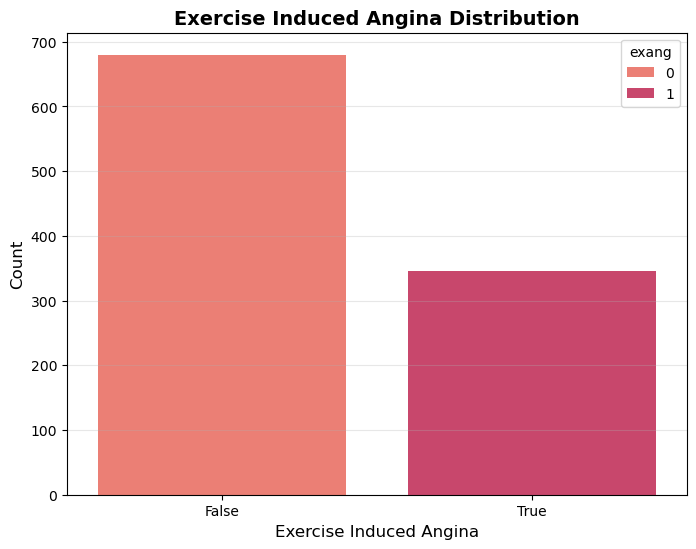

In [17]:
# --- Simplified Histogram ---
plt.figure(figsize=(8, 6))
plt.title('Exercise Induced Angina Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='exang', data=df, palette=['#FF6F61', '#DE3163'], hue ='exang', legend ='auto',
              order=df['exang'].value_counts().index)
plt.xlabel('Exercise Induced Angina', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['False', 'True'])
plt.grid(axis='y', alpha=0.3)

plt.show()

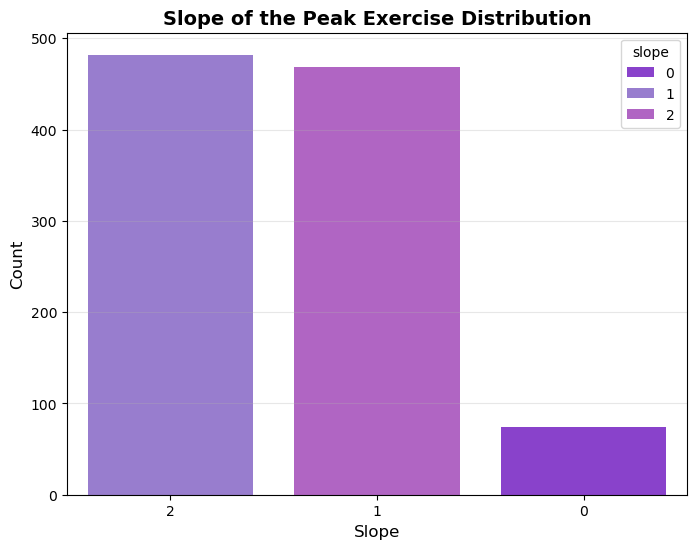

In [18]:
# --- Simplified Histogram ---
plt.figure(figsize=(8, 6))
plt.title('Slope of the Peak Exercise Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='slope', data=df, palette=['#8A2BE2', '#9370DB', '#BA55D3'], hue ='slope', legend ='auto',
              order=df['slope'].value_counts().index)
plt.xlabel('Slope', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['2', '1', '0'])
plt.grid(axis='y', alpha=0.3)

plt.show()


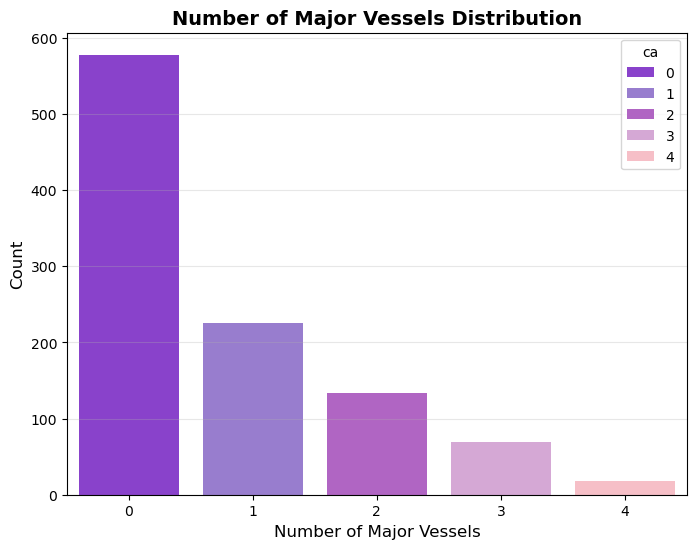

In [19]:
# --- Simplified Histogram ---
plt.figure(figsize=(8, 6))
plt.title('Number of Major Vessels Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='ca', data=df, palette=['#8A2BE2', '#9370DB', '#BA55D3', '#DDA0DD', '#FFB6C1'], hue='ca',legend='auto',
              order=df['ca'].value_counts().index)
plt.xlabel('Number of Major Vessels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.grid(axis='y', alpha=0.3)

plt.show()


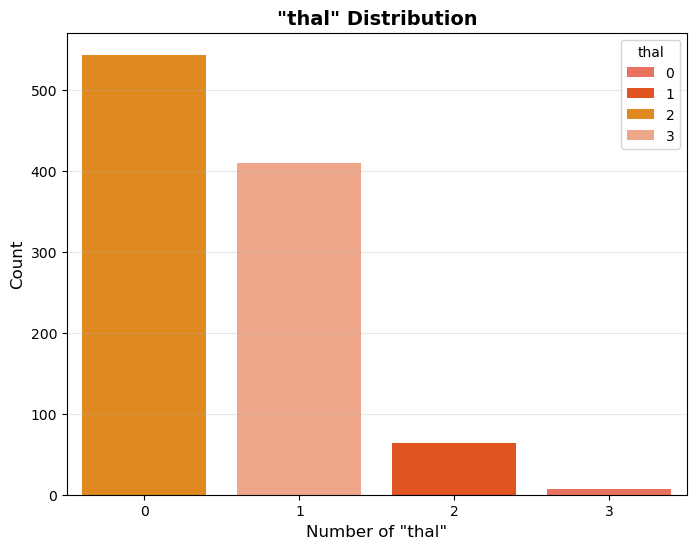

In [20]:
# --- Simplified Histogram ---
plt.figure(figsize=(8, 6))
plt.title('"thal" Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='thal', data=df, palette=['#FF6347', '#FF4500', '#FF8C00', '#FFA07A'], hue='thal',legend='auto',
              order=df['thal'].value_counts().index)
plt.xlabel('Number of "thal"', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])  # Adjust labels based on your data
plt.grid(axis='y', alpha=0.3)

plt.show()


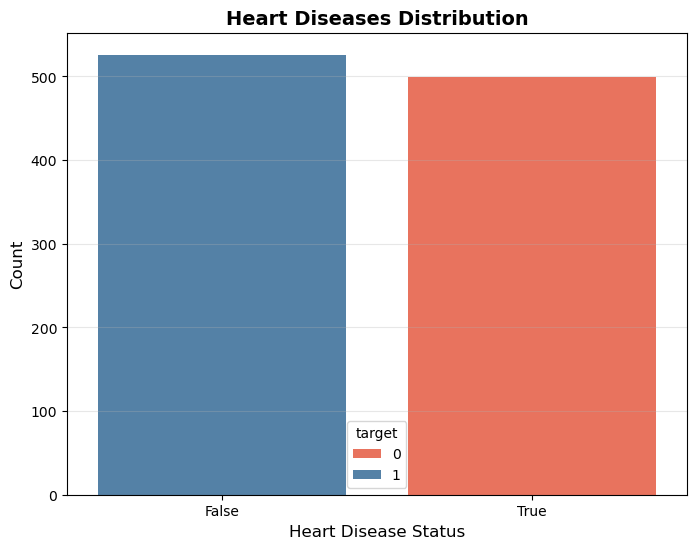

In [21]:
# --- Simplified Histogram ---
plt.figure(figsize=(8, 6))
plt.title('Heart Diseases Distribution', fontweight='bold', fontsize=14)

sns.countplot(x='target', data=df, palette=['#FF6347', '#4682B4'], hue='target',legend='full',
              order=df['target'].value_counts().index)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['False', 'True'])
plt.grid(axis='y', alpha=0.3)

plt.show()


In [22]:
# Descriptive Statistics
df.select_dtypes(exclude='object').describe()

,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


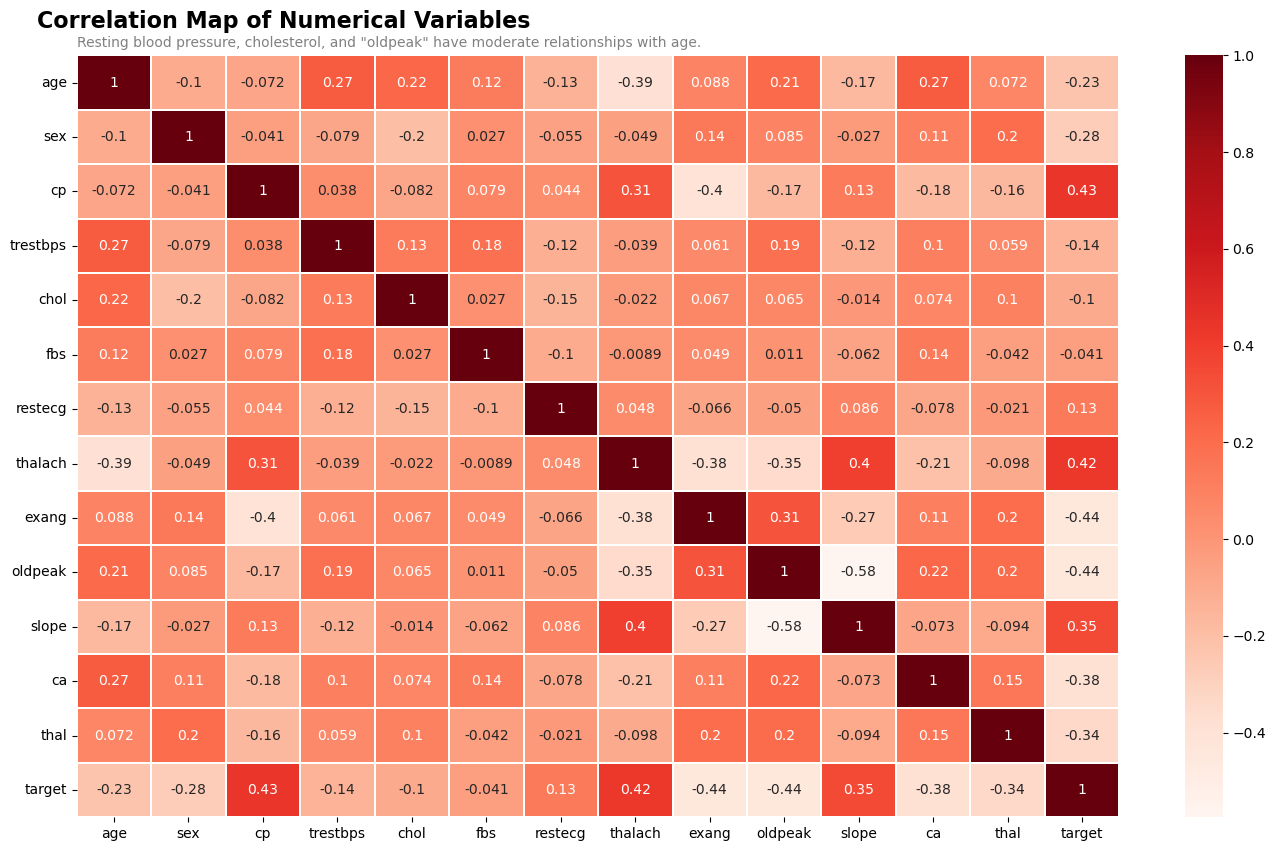

In [23]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)

# --- General and Sub Titles ---
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize=16, fontfamily='sans-serif', 
             color='black')

plt.title('Resting blood pressure, cholesterol, and "oldpeak" have moderate relationships with age.', 
          fontsize=10, fontfamily='sans-serif', loc='left', color='gray')

# --- Tight Layout ---
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

plt.show()

In [24]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [25]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [26]:
# --- Seperating Dependent Features ---
X = df.drop(['target'], axis=1)
Y = df['target']

In [29]:
# --- Data Normalization using Min-Max Method ---
X = MinMaxScaler().fit_transform(X)

In [31]:
# --- Splitting Dataset into 80:20 ---
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )

In [35]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)

In [36]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
threshold = 0.5

lr_train_proba = lr.predict_proba(X_train)[:, 1]
lr_train_pred = (lr_train_proba >= threshold).astype(int)

lr_test_proba = lr.predict_proba(X_test)[:, 1]
lr_test_pred = (lr_test_proba >= threshold).astype(int)

lr_train_acc = round(accuracy_score(y_train,lr_train_pred)*100,2)
lr_test_acc = round(accuracy_score(y_test,lr_test_pred)*100,2)

print('Test Accuracy = ' , lr_train_acc,' %')
print('Train Accuracy = ' , lr_test_acc,' %')

Test Accuracy =  87.56  %
Train Accuracy =  81.46  %


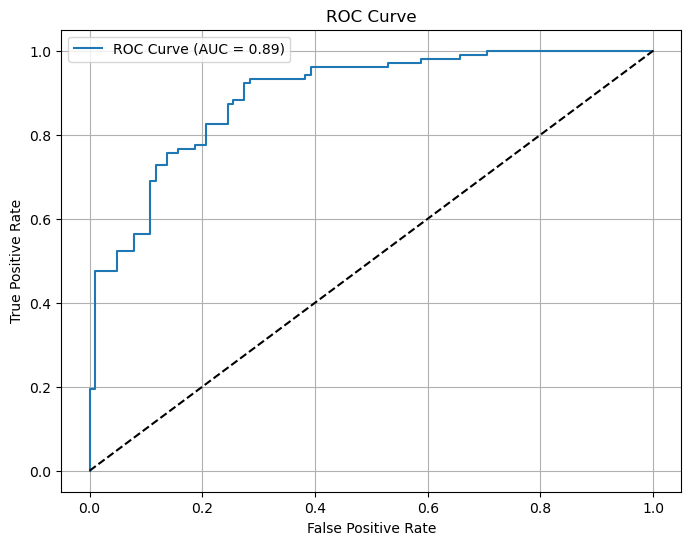

Best Threshold: 0.43581407073635536


In [38]:
# plotting ROC Curve
lr_fprs, lr_tprs, lr_thresholds = roc_curve(y_test, lr_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(lr_fprs, lr_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(lr_fprs, lr_tprs)))
#plt.plot(lr_fprs, lr_tprs, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
lr_best_threshold_index = np.argmax(lr_tprs - lr_fprs)
lr_best_threshold = lr_thresholds[lr_best_threshold_index]

print("Best Threshold:", lr_best_threshold)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

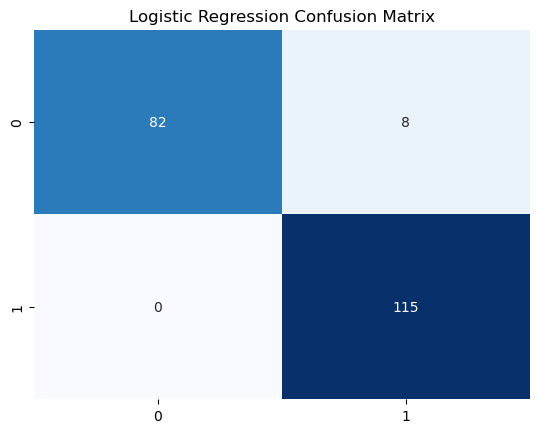

In [39]:
# Predict using the best threshold
lr_test_best_pred = (lr_test_proba >= lr_best_threshold).astype(int)

conf_matrix = confusion_matrix(lr_test_pred, lr_test_best_pred)

sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)

plt.title('Logistic Regression Confusion Matrix')

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
threshold = 0.8

knn_train_proba = knn.predict_proba(X_train)[:, 1]
knn_train_pred = (knn_train_proba >= threshold).astype(int)

knn_test_proba = knn.predict_proba(X_test)[:, 1]
knn_test_pred = (knn_test_proba >= threshold).astype(int)

knn_train_acc = round(accuracy_score(y_train,knn_train_pred)*100,2)
knn_test_acc = round(accuracy_score(y_test,knn_test_pred)*100,2)

print('Test Accuracy = ' , knn_test_acc,' %')
print('Train Accuracy = ' , knn_train_acc,' %')


Test Accuracy =  92.68  %
Train Accuracy =  97.8  %


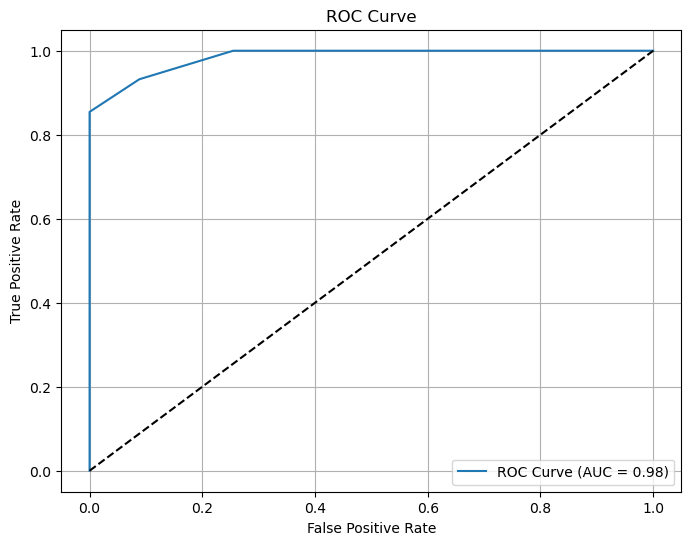

Best Threshold: 1.0


In [42]:
# plotting ROC Curve
knn_fprs, knn_tprs, knn_thresholds = roc_curve(y_test, knn_test_proba)

plt.figure(figsize=(8, 6))

plt.plot(knn_fprs, knn_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(knn_fprs, knn_tprs,)))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
knn_best_threshold_index = np.argmax(knn_tprs - knn_fprs)
knn_best_threshold = knn_thresholds[knn_best_threshold_index]

print("Best Threshold:", knn_best_threshold)

Text(0.5, 1.0, 'K-Nearest Neighbors Confusion Matrix')

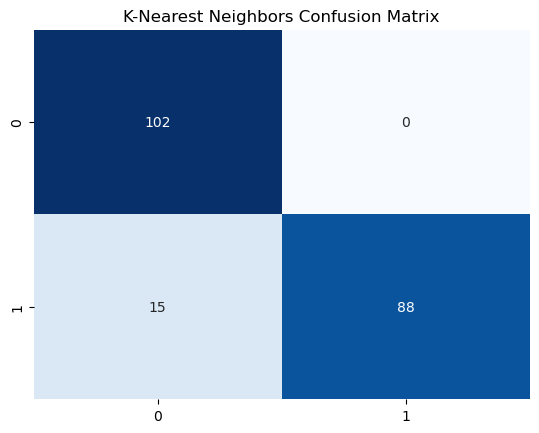

In [43]:
# Predict using the best threshold

knn_test_best_pred = (knn_test_proba >= knn_best_threshold).astype(int)

conf_matrix = confusion_matrix(y_test, knn_test_best_pred)

sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)

plt.title('K-Nearest Neighbors Confusion Matrix')


In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
threshold = 0.5

dt_train_proba = dt.predict_proba(X_train)[:, 1]
dt_train_pred = (dt_train_proba >= threshold).astype(int)

dt_test_proba = dt.predict_proba(X_test)[:, 1]
dt_test_pred = (dt_test_proba >= threshold).astype(int)

dt_train_acc = round(accuracy_score(y_train,dt_train_pred)*100,2)
dt_test_acc = round(accuracy_score(y_test,dt_test_pred)*100,2)

print('Test Accuracy = ' , dt_test_acc,' %')
print('Train Accuracy = ' , dt_train_acc,' %')

Test Accuracy =  98.54  %
Train Accuracy =  100.0  %


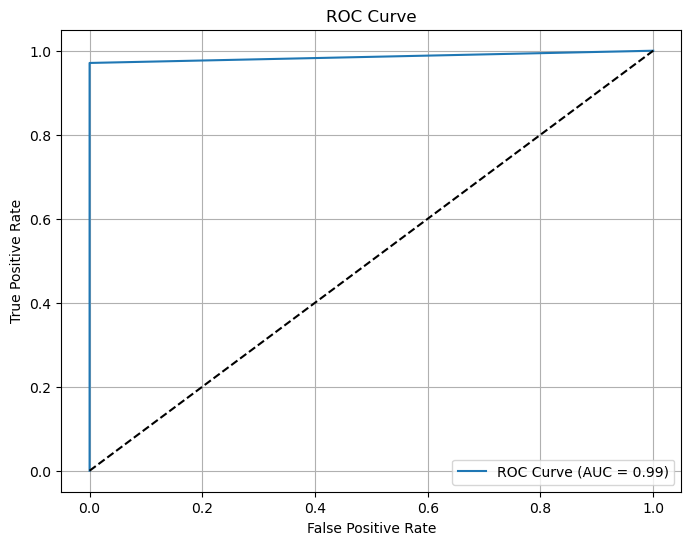

Best Threshold: 1.0


In [46]:
# plotting ROC Curve
dt_fprs, dt_tprs, dt_thresholds = roc_curve(y_test, dt_test_proba)

plt.figure(figsize=(8, 6))

plt.plot(dt_fprs, dt_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(dt_fprs, dt_tprs)))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
dt_best_threshold_index = np.argmax(dt_tprs - dt_fprs)
dt_best_threshold = dt_thresholds[dt_best_threshold_index]

print("Best Threshold:", dt_best_threshold)

Test Accuracy =  98.54  %
Train Accuracy =  100.0  %


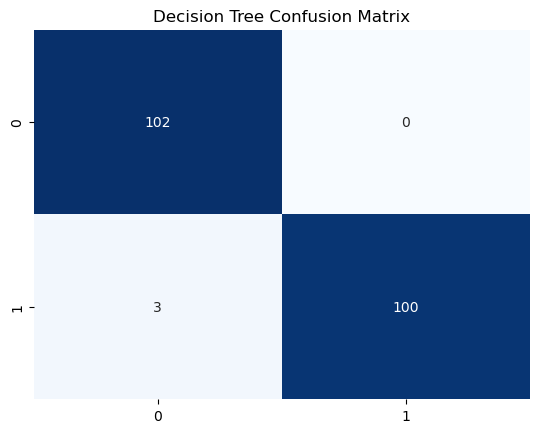

In [47]:
ytest_pred = dt.predict(X_test)
ytrain_pred = dt.predict(X_train)
cm = confusion_matrix(y_test, ytest_pred)
dt_train_acc = round(accuracy_score(y_train,ytrain_pred)*100,2)
dt_test_acc = round(accuracy_score(y_test,ytest_pred)*100,2)
print('Test Accuracy = ' , dt_test_acc,' %')
print('Train Accuracy = ' , dt_train_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

In [48]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Decision Tree'
    ],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,dt_train_acc
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,dt_test_acc
    ]
})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
2,Decision Tree,100.00,98.54
1,K Nearest Neighbors,97.80,92.68
0,Logistic Regression,87.56,81.46


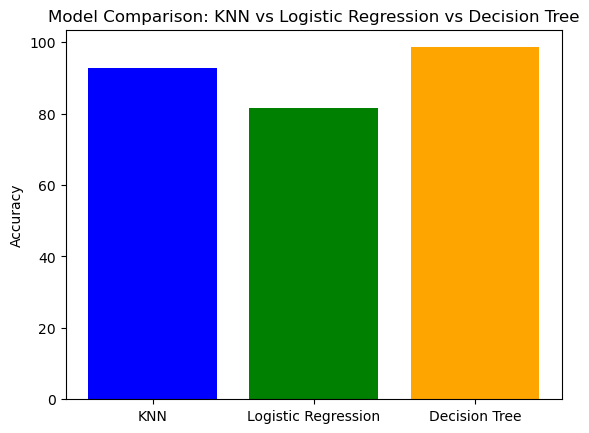



Accuracy of KNN: 92.68

Accuracy of Logistic Regression: 81.46



In [49]:
models = ['KNN', 'Logistic Regression','Decision Tree']
accuracies = [ knn_test_acc,lr_test_acc,dt_test_acc]

plt.bar(models, accuracies, color=['blue', 'green','orange'])
plt.title('Model Comparison: KNN vs Logistic Regression vs Decision Tree')
plt.ylabel('Accuracy')
plt.show()

print(f'\n\nAccuracy of KNN: {knn_test_acc:.2f}\n')
print(f'Accuracy of Logistic Regression: {lr_test_acc:.2f}\n')

